# LassoRegression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### The Model

In [2]:
def lasso_with_coordinate_descent(X, y, l1_penalty, tolerance=1.0):
    '''Runs coordinate descent on the normalized data.
    Returns parameters learned by the model with l1 regularization
    '''

    m = X.shape[0]  # Training Examples
    n = X.shape[1]  # No. of features
    X = np.hstack((np.ones((m, 1)), X))  # Adding a column of ones for 0th feature i.e. Intercept

    w = np.zeros((n + 1, 1))
    max_step = tolerance

    while max_step >= tolerance:

        max_step_j = 0

        for j in range(n + 1):

            old_w_j = w[j, 0]

            y_cap = np.matmul(X, w)                                     # Prediction
            y_cap_wj_minus = y_cap - (X[:, j].reshape(-1,1) * w[j, 0])  # Prediction without jth feature
            error_wj_minus = y - y_cap_wj_minus                         # Error without jth feature
            roh_j = np.dot(X[:, j], error_wj_minus.flatten())

            # update
            if j == 0:
                w[j, 0] = roh_j  # No penalization of intercept
            else:
                if roh_j < -l1_penalty / 2.0:
                    w[j, 0] = roh_j + l1_penalty / 2.0
                elif roh_j > l1_penalty / 2.0:
                    w[j, 0] = roh_j - l1_penalty / 2.0
                else:
                    w[j, 0] = 0

            current_step = np.abs(w[j, 0] - old_w_j)
            if current_step > max_step_j:
                max_step_j = current_step

        max_step = max_step_j

    return w

def generate_polynomial_features(x, degree=2):
    X = np.empty((x.shape[0], degree), dtype=x.dtype)
    
    for i in range(degree):
        X[:,i] = x[:,0] ** (i+1)
    
    return X

### Linear Data with noise

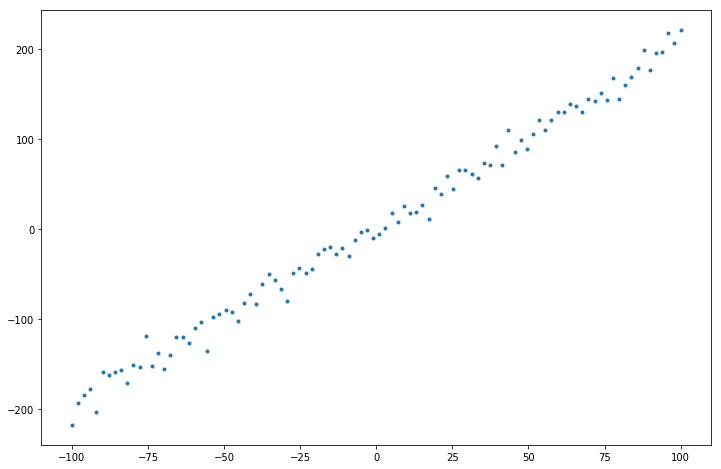

In [3]:
x = np.linspace(-100,100,100).reshape((-1,1))
y =  2 * x + 5
y = y + np.random.randn(x.shape[0],1) * 10                  # Adding noise to data
plt.figure(figsize=(12,8))
plt.plot(x[:,0], y, '.')

### Generating Polynomial Features of much higher degree

In [4]:
X = generate_polynomial_features(x, degree=16)
norms = np.linalg.norm(X, axis=0)
X = X  / norms
X.shape

(100, 16)

### Fitting a L1 regularized model on Polynomial Features

In [5]:
w = lasso_with_coordinate_descent(X, y, 2e3, 3.6e3)

In [6]:
print(w)

[[  293.45800984]
 [  171.93057006]
 [-1150.82477103]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]
 [    0.        ]]


We can see that the higher degree coefficients are zero.

### Lasso Regression on Housing data with all features

In [7]:
df = pd.read_csv('data/LinearRegression_kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900,3,1.00,1180.0,5650,1.0,0,0,3,7,1180,0,1955.0,NaN,98178.0,47.5112,-122.257
1,6414100192,20141209T000000,538000,3,2.25,2570.0,7242,2.0,0,0,3,7,2170,400,1951.0,1991.0,98125.0,47.7210,-122.319
2,5631500400,20150225T000000,180000,2,1.00,770.0,10000,1.0,0,0,3,6,770,0,1933.0,NaN,98028.0,47.7379,-122.233
3,2487200875,20141209T000000,604000,4,3.00,1960.0,5000,1.0,0,0,5,7,1050,910,1965.0,NaN,98136.0,47.5208,-122.393
4,1954400510,20150218T000000,510000,3,2.00,1680.0,8080,1.0,0,0,3,8,1680,0,1987.0,NaN,98074.0,47.6168,-122.045


#### Analyzing nan values of the data

In [8]:
df.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          8
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             6
yr_renovated     20699
zipcode              4
lat                  0
long                 0
dtype: int64

#### Filling nan values of the data with most approprite methods

In [9]:
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])
df['zipcode'] = df['zipcode'].fillna(method='ffill')
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].mean())
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         6
yr_renovated     6
zipcode          0
lat              0
long             0
dtype: int64

Only 6 rows will be dropped with nan values

#### Selecting features

In [10]:
columns_to_select = ['bedrooms',
                'bathrooms',
                'sqft_living',
                'sqft_lot',
                'floors',
                'waterfront', 
                'view', 
                'condition', 
                'grade',
                'sqft_above',
                'sqft_basement',
                'yr_built', 
                'yr_renovated']

In [11]:
df = df[columns_to_select + ['price']].dropna()     # Only 6 rows dropped
X = np.array(df[columns_to_select])
y = np.array(df['price']).reshape(-1,1)
print(X.shape, y.shape)

(21607, 13) (21607, 1)


#### Feature Normalization

In [14]:
norms = np.linalg.norm(X, axis=0)
X = X / norms

#### Running the model

In [24]:
w = lasso_with_coordinate_descent(X, y, 2.5e10, 2e12)

In [25]:
pd.Series(w.flatten(), index= ['Intercept'] + columns_to_select)

Intercept        1.166979e+10
bedrooms        -1.641014e+12
bathrooms       -3.577735e+10
sqft_living      1.631296e+09
sqft_lot        -8.296067e+09
floors          -5.206807e+10
waterfront       0.000000e+00
view             9.322909e+09
condition       -3.767553e+10
grade            0.000000e+00
sqft_above       6.799517e+10
sqft_basement    5.512374e+10
yr_built        -9.357435e+10
yr_renovated     0.000000e+00
dtype: float64

We can see that the weights for the less important features are made zero by lasso. We can train using non zero features using least squares regression to further improve the performance. This is called <b>debiasing lasso</b>.

We can choose hyperparameters of lasso like L1_penalty by k_fold_cross_validation or just validation set just like in Ridge Regression.